[![logo](https://climate.copernicus.eu/sites/default/files/custom-uploads/branding/LogoLine_horizon_CAMS.png)](https://atmosphere.copernicus.eu)

# Access ACTRIS In-Situ NRT data 

**Run the tutorial via free cloud platforms**: [![binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/ecmwf-training/cams-act6/main?labpath=jupyter-notebook-template.ipynb)
[![kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/ecmwf-training/cams-act6/blob/main/jupyter-notebook-template.ipynb)
[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ecmwf-training/cams-act6/blob/main/jupyter-notebook-template.ipynb)


## Learning objectives

Brief description of what participants can expect to achieve with this notebook.

## Initial setup

Before we begin we must prepare our environment. This includes importing the various Python libraries that we will need.

### Import libraries

In [1]:
# Libraries for working with multidimensional arrays
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.pyplot as plt


# Libaries for working with API and json data
import json

## Explore and download data

### Streaming of data

In [3]:
f = open('static/basket_NOx_Hyytiala.json') # open the file "basket.json"
md = json.load(f) # load the json file


## Inspect data

In [6]:
first_element = next(iter(md)) # get the key to the first element of the dictionary
md[first_element] # get the metadata of the first element of the dictionary

{'id': 226094,
 'title': 'Nitrogen oxides at Hyytiälä',
 'matrix': 'gas phase',
 'instrumentType': 'chemiluminescence detector, photolytical converter',
 'station': 'Hyytiälä',
 'startTime': '2015-12-31T23:00:00.0000000Z',
 'endTime': '2017-12-31T23:00:00.0000000Z',
 'downloadUrl': 'https://thredds.nilu.no/thredds/fileServer/ebas_doi/8K/NS/UU/8KNS-UUNJ.nc',
 'opendapUrl': 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/8K/NS/UU/8KNS-UUNJ.nc',
 'variables': ['nitric oxide mass concentration',
  'nitrogen dioxide mass concentration',
  'nitrogen oxides mass concentration'],
 'pid': 'https://doi.org/10.48597/8KNS-UUNJ',
 'repository': 'IN-SITU'}

In [7]:
ds = xr.open_dataset(md[first_element]['opendapUrl'])
ds

<xarray.Dataset>
Dimensions:                                                (time: 17544,
                                                            tbnds: 2,
                                                            metadata_time: 2,
                                                            NOx_nmol_per_mol_amean_qc_flags: 1,
                                                            NOx_ug_N_per_m3_amean_qc_flags: 1,
                                                            NOx_nmol_per_mol_ExpUnc2s_qc_flags: 1,
                                                            ...
                                                            nitrogen_monoxide_nmol_per_mol_perc8413_qc_flags: 1,
                                                            nitrogen_monoxide_ug_N_per_m3_perc8413_qc_flags: 1,
                                                            nitrogen_monoxide_nmol_per_mol_precision_qc_flags: 1,
                                                            nitrogen_monoxide_ug_N_per_m3_precision_qc_flags: 1,
                                                            nitrogen_monoxide_nmol_per_mol_stddev_qc_flags: 1,
                                                            nitrogen_monoxide_ug_N_per_m3_stddev_qc_flags: 1)
Coordinates:
  * time                                                   (time) datetime64[ns] ...
  * metadata_time                                          (metadata_time) datetime64[ns] ...
Dimensions without coordinates: tbnds, NOx_nmol_per_mol_amean_qc_flags,
                                NOx_ug_N_per_m3_amean_qc_flags,
                                NOx_nmol_per_mol_ExpUnc2s_qc_flags,
                                NOx_ug_N_per_m3_ExpUnc2s_qc_flags,
                                NOx_nmol_per_mol_prec1587_qc_flags,
                                NOx_ug_N_per_m3_prec1587_qc_flags,
                                ...
                                nitrogen_monoxide_nmol_per_mol_perc8413_qc_flags,
                                nitrogen_monoxide_ug_N_per_m3_perc8413_qc_flags,
                                nitrogen_monoxide_nmol_per_mol_precision_qc_flags,
                                nitrogen_monoxide_ug_N_per_m3_precision_qc_flags,
                                nitrogen_monoxide_nmol_per_mol_stddev_qc_flags,
                                nitrogen_monoxide_ug_N_per_m3_stddev_qc_flags
Data variables: (12/110)
    time_bnds                                              (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                                     (metadata_time, tbnds) datetime64[ns] ...
    NOx_nmol_per_mol_amean                                 (time) float64 ...
    NOx_nmol_per_mol_amean_qc                              (NOx_nmol_per_mol_amean_qc_flags, time) float64 ...
    NOx_nmol_per_mol_amean_ebasmetadata                    (metadata_time) |S64 ...
    NOx_ug_N_per_m3_amean                                  (time) float64 ...
    ...                                                     ...
    nitrogen_monoxide_nmol_per_mol_stddev                  (time) float64 ...
    nitrogen_monoxide_nmol_per_mol_stddev_qc               (nitrogen_monoxide_nmol_per_mol_stddev_qc_flags, time) float64 ...
    nitrogen_monoxide_nmol_per_mol_stddev_ebasmetadata     (metadata_time) |S64 ...
    nitrogen_monoxide_ug_N_per_m3_stddev                   (time) float64 ...
    nitrogen_monoxide_ug_N_per_m3_stddev_qc                (nitrogen_monoxide_ug_N_per_m3_stddev_qc_flags, time) float64 ...
    nitrogen_monoxide_ug_N_per_m3_stddev_ebasmetadata      (metadata_time) |S64 ...
Attributes: (12/108)
    Conventions:                                   CF-1.8, ACDD-1.3
    featureType:                                   timeSeries
    title:                                         Nitrogen oxides at Hyytiälä
    keywords:                                      mole_fraction_of_nitrogen_...
    id:                                            8KNS-UUNJ.nc
    naming_authority:           

## Data processing, such as unit conversion, aggregation, etc.

In [18]:
ds_nox_list = []
ds_no2_list = []
ds_no_list = []

for i in md:  # Iterate over the keys in the 'md' dictionary
    ds = xr.open_dataset(md[i]['opendapUrl'])  # Open the dataset using the 'opendapUrl' from the metadata
    
    for v in list(ds.data_vars.keys()):  # Iterate over the variables in the dataset
        attrs = ds[v].attrs  # Get the attributes of the variable
        if attrs.get('ebas_statistics') == 'arithmetic mean' and attrs.get('units')=='ug/m3':  # Choose if you want to look at nitrogen oxides in 'ug/m3' or 'nmol/mol'
            std_name = attrs.get('standard_name')
            if 'nox' in std_name: 
                ds_nox_list.append(ds[v])
            if 'nitrogen_dioxide' in std_name: 
                ds_no2_list.append(ds[v])
            if 'nitrogen_monoxide' in std_name: 
                ds_no_list.append(ds[v])


In [19]:
# Concatenate the list of DataArrays in ds_no along the 'time' dimension
no_ds = xr.concat([ds for ds in ds_no_list], dim='time')

# Concatenate the list of DataArrays in ds_no2 along the 'time' dimension
no2_ds = xr.concat([ds for ds in ds_no2_list], dim='time')

# Concatenate the list of DataArrays in ds_nox along the 'time' dimension
nox_ds = xr.concat([ds for ds in ds_nox_list], dim='time')


## Data visualisation

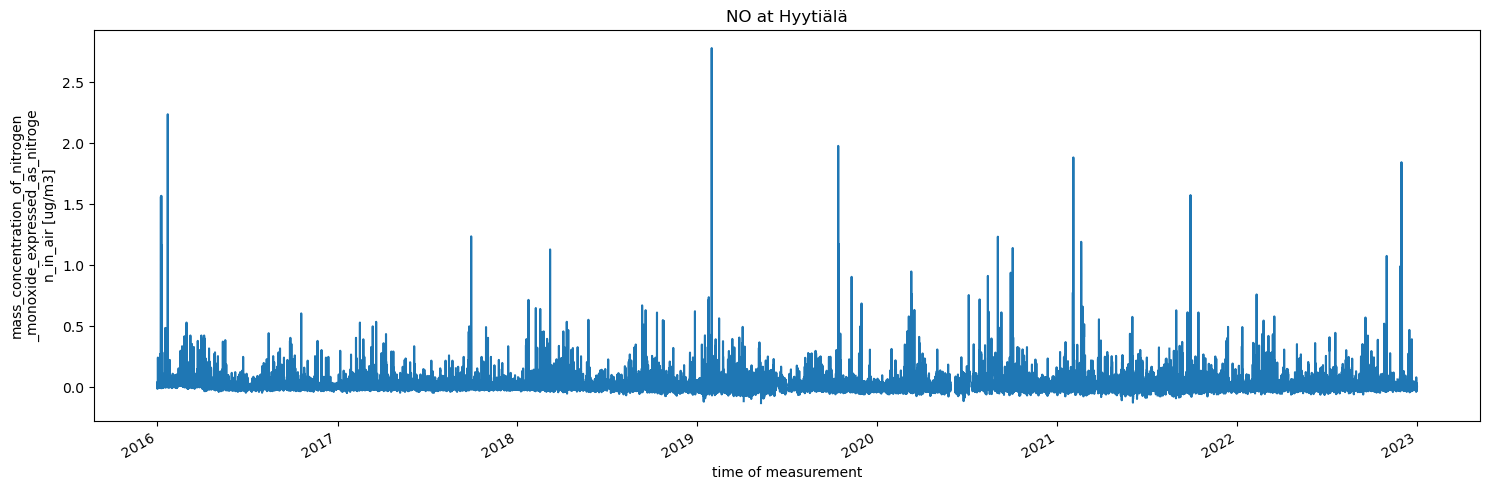

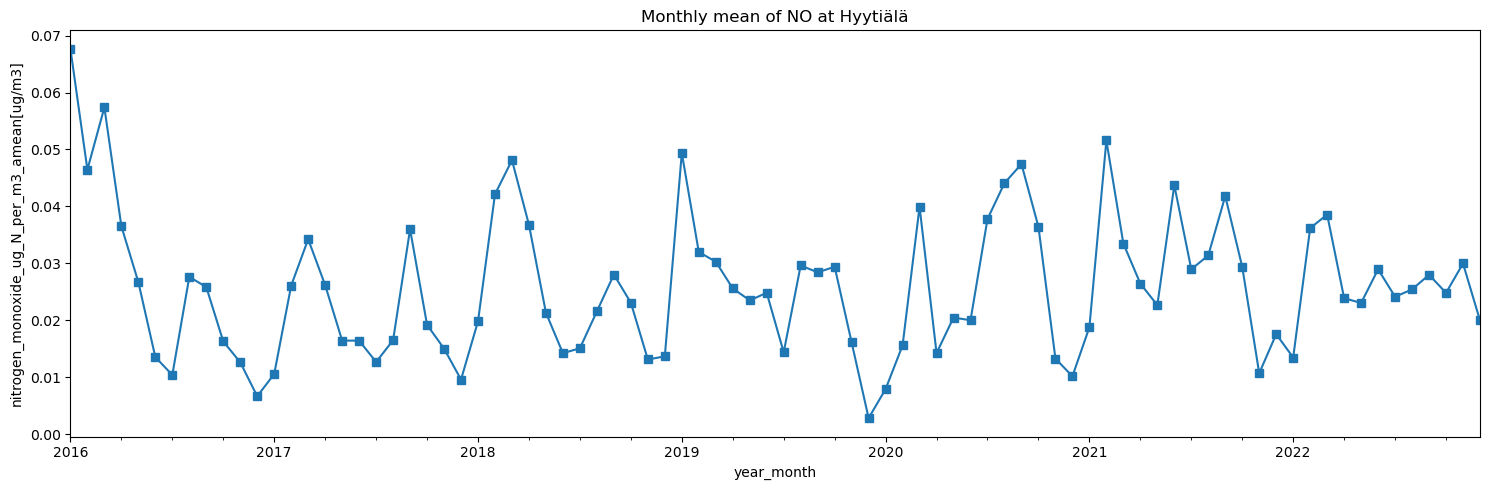

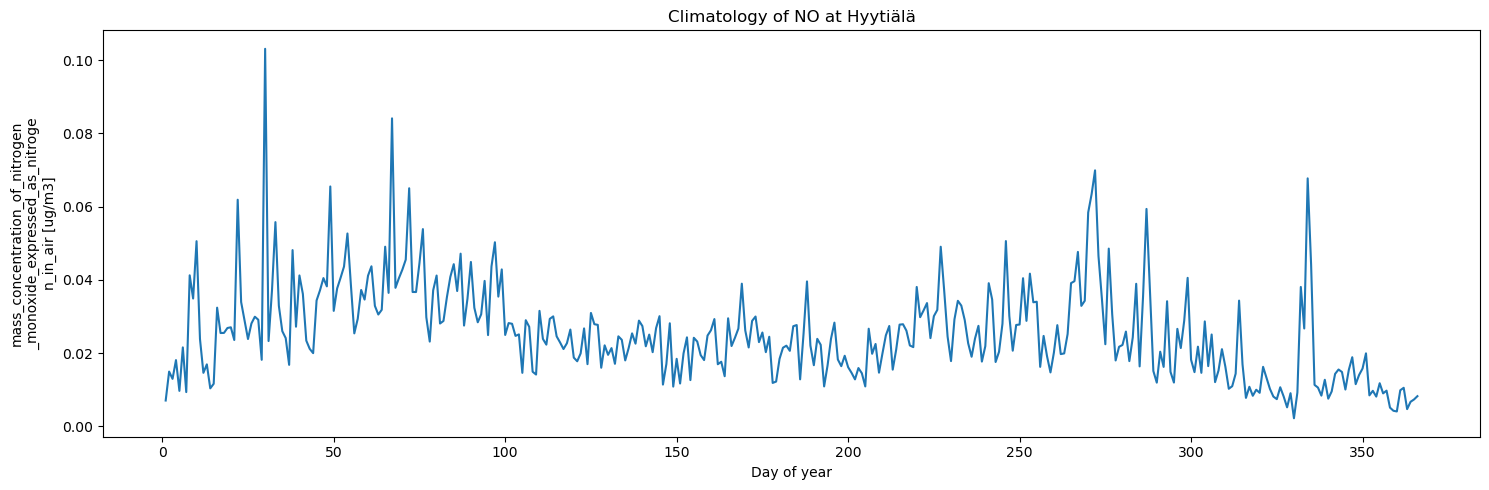

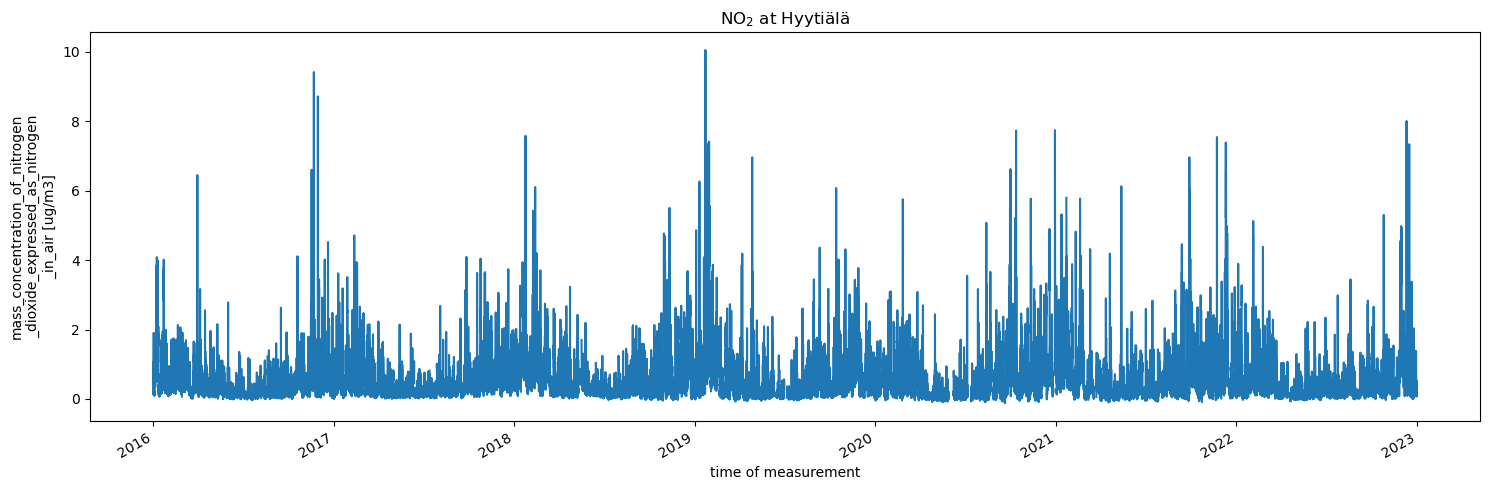

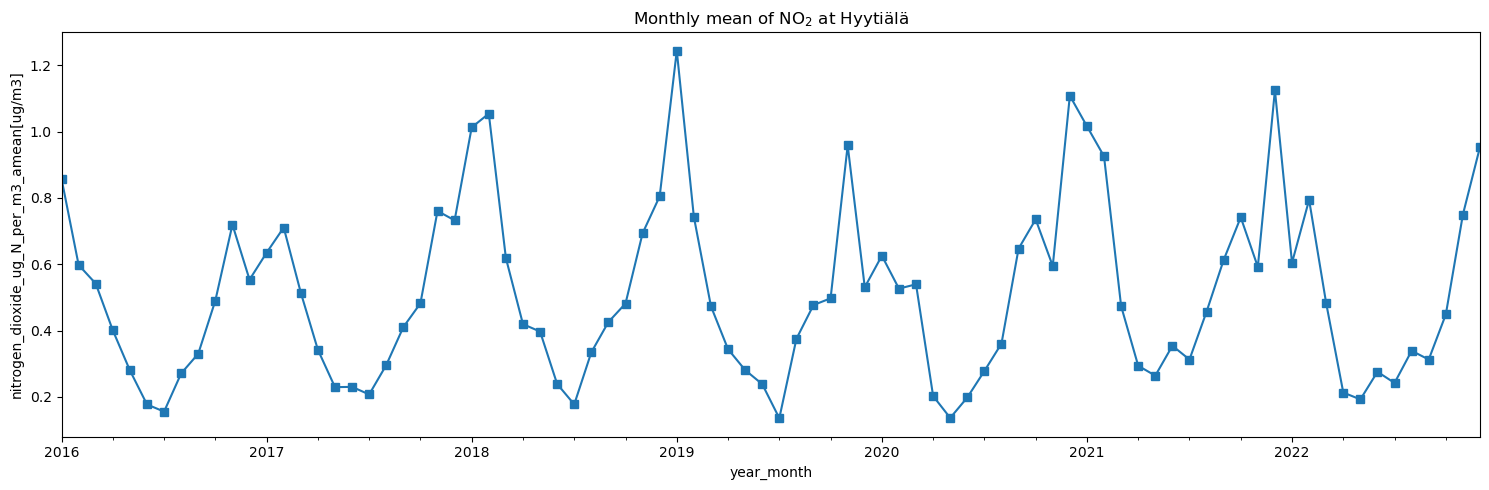

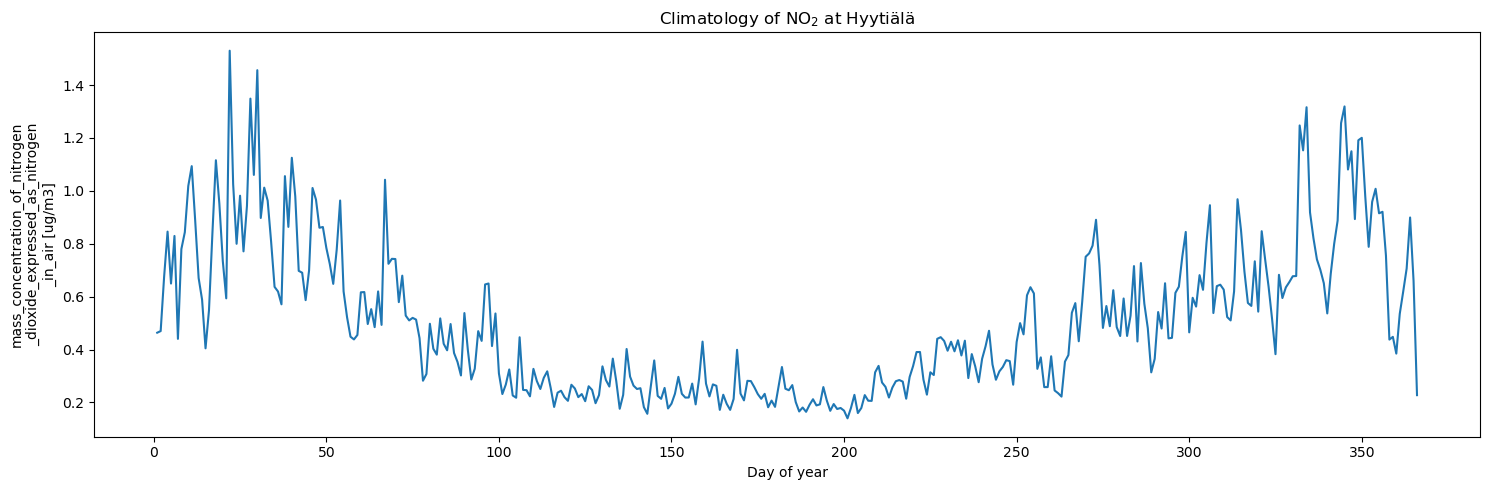

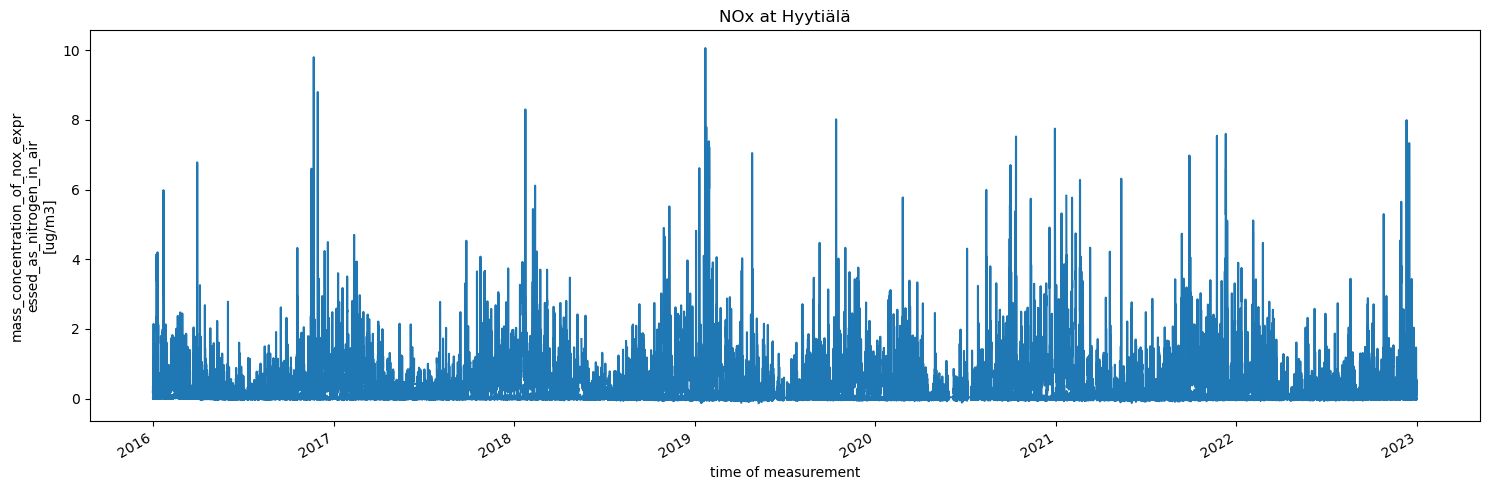

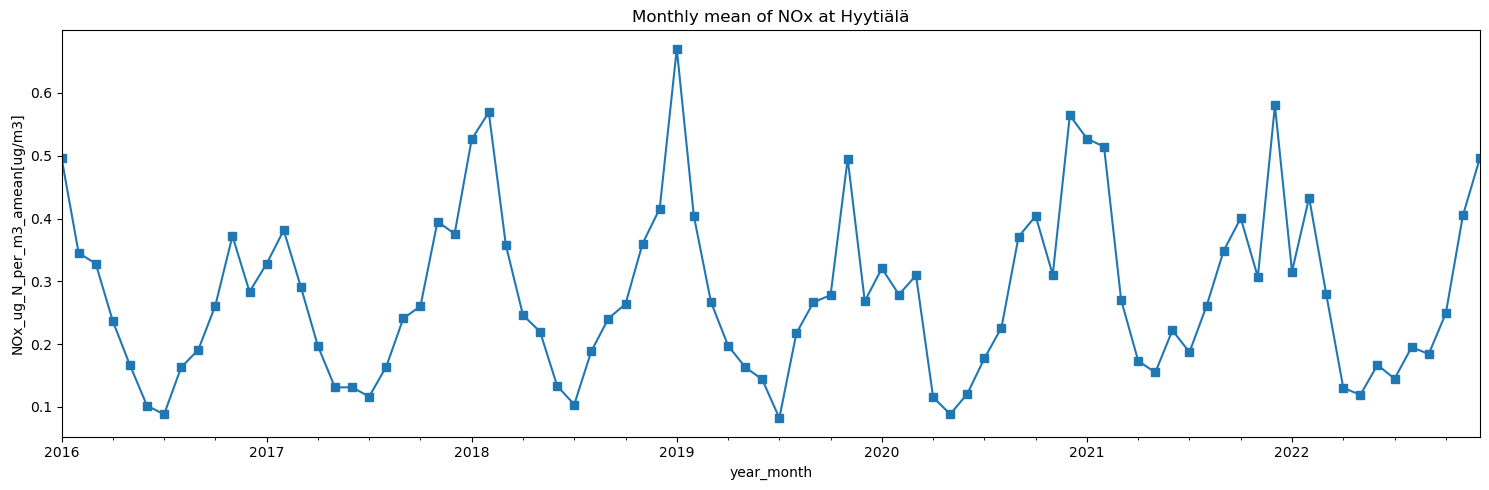

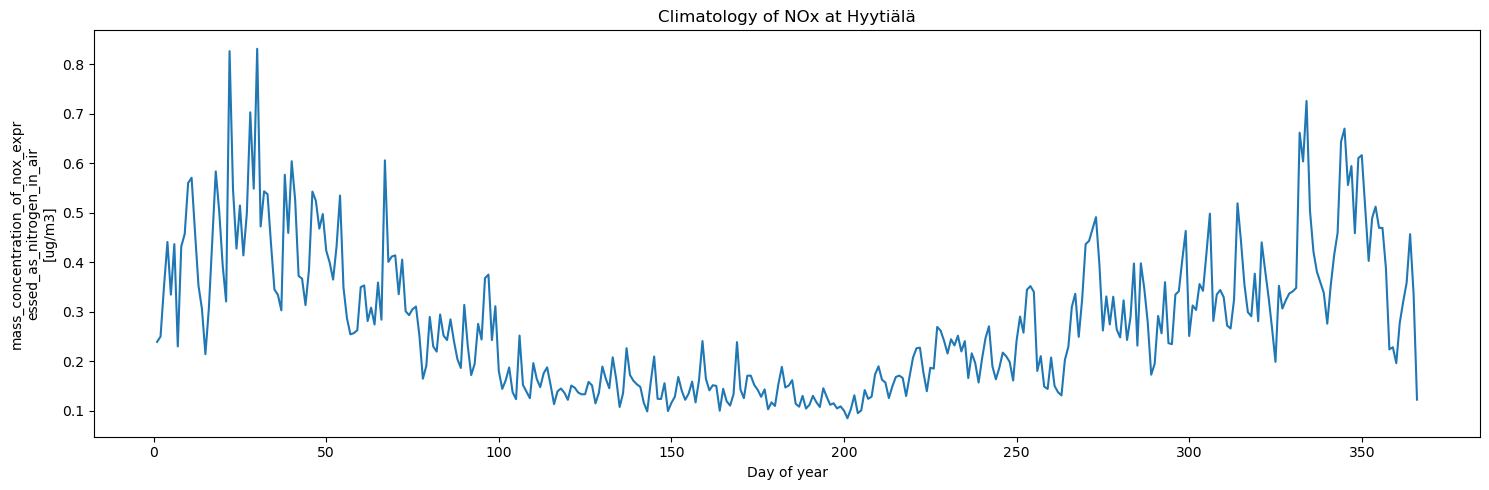

In [41]:
def rename_title(component): 
    if component == 'nox': 
        return 'NOx'
    if component == 'nitrogen_dioxide':
        return 'NO$_2$'
    if component == 'nitrogen_monoxide':
        return 'NO'
    else: 
        return component

def year_month(xray_obj):
    """Given an xray object with a 'time' coordinate, return an DataArray
    with values given by the first date of the month in which each time
    falls.
    """
    time = xray_obj.coords['time']
    values = time.to_index().to_period('M').to_timestamp()
    return xr.DataArray(values, [time], name='year_month')

nitrogen_oxides = [no_ds, no2_ds, nox_ds] 

for ds in nitrogen_oxides: 
    plt.figure(figsize=(15, 5))
    ds.plot()
    plt.title('{} at {}'.format(rename_title(ds.ebas_component),ds.ebas_station_name))
    plt.tight_layout()
    plt.show()

    monthly_avg = ds.groupby(year_month(ds)).mean()
    monthly_avg.to_dataframe().plot(style='s-', figsize=(15, 5))
    plt.title('Monthly mean of {} at {}'.format(rename_title(ds.ebas_component),ds.ebas_station_name))
    plt.ylabel(plt.legend().get_texts()[0].get_text()+'['+ds.units+']')
    plt.legend().remove()
    plt.tight_layout()
    plt.show()

    ds.groupby('time.dayofyear').mean().plot(figsize=(15, 5))
    plt.title('Climatology of {} at {}'.format(rename_title(ds.ebas_component),ds.ebas_station_name))
    plt.xlabel('Day of year')
    plt.tight_layout()
    plt.show()

## Take home messages

Summarise key take home messages.